# A dialog with chatGPT on 3D point cloud manipulations
Interlocutor: GPT, I would like to explore using continuous 3D functions and inequalities as a means of masking a 3D point clouds. As a simple starting point, let's consider a sphere of radius equal to half the width of the point cloud. Select all the points within the sphere and translating them laterally in the Y direction by half the width of the point cloud. Give me some python code.

GPT: Certainly! To mask a 3D point cloud using a spherical region and then translate the selected points, you can follow these steps:

1. Define the 3D point cloud.
2. Define the sphere's radius and center.
3. Select points within the sphere.
4. Translate the selected points.
### Explanation:

1. Generate a random 3D point cloud: A random 3D point cloud with num_points points is created using numpy.
2. Define the center and radius of the sphere: The center of the sphere is set at [0.5, 0.5, 0.5] and the radius is 0.25.
3. Calculate the distance of each point from the center: The Euclidean distance from each point in the point cloud to the center of the sphere is calculated.
4. Select points within the sphere: Points with distances less than the radius are selected.
5. Translate the selected points in the Y direction: The selected points are translated by 0.5 units in the Y direction.
6. Plot the original and masked point cloud: The original point cloud and the masked, translated points are plotted using matplotlib.

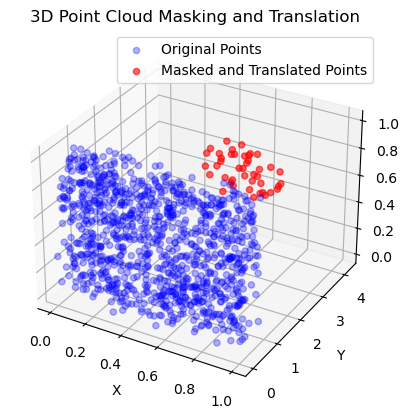

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a random 3D point cloud
num_points = 1000
point_cloud = np.random.rand(num_points, 3)

# Define the center and radius of the sphere
center = np.array([0.5, 0.5, 0.5])
radius = 0.25

# Calculate the distance of each point from the center
distances = np.linalg.norm(point_cloud - center, axis=1)

# Select points within the sphere
within_sphere = distances < radius
masked_points = point_cloud[within_sphere]

# Translate the selected points in the Y direction
translation_distance = 3.5  # Translate by half the width of the point cloud
masked_points[:, 1] += translation_distance

# Plot the original and masked point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot original points
ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], color='blue', alpha=0.3, label='Original Points')

# Plot masked and translated points
ax.scatter(masked_points[:, 0], masked_points[:, 1], masked_points[:, 2], color='red', alpha=0.6, label='Masked and Translated Points')

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Masking and Translation')

# Show legend
ax.legend()

# Show plot
plt.show()


Interlocutor: Modify the code so that the final point cloud is saved as a .ply file. Also import open3D so that the point cloud may be rendered in a movable 3D grid. After translating the points within the sphere delete the points that were translated from the original cloud, color the translated points red and the remaining original points blue, and keep this coloring schema both in the matplotlib picture as well as the open3D rendering.

GPT: Here is the modified code:

First, make sure you install Open3D:



<code> pip install open3d <code>

Explanation of the changes:

1. Install Open3D: Ensure Open3D is installed in your environment using pip install open3d.
2. Import Open3D: Import the open3d library.
3. Remove the translated points from the original cloud: The remaining_points array contains the points not within the sphere.
4. Combine the remaining original points and the translated masked points: The final_point_cloud includes both sets of points.
5. Create colors for the points: The colors array is created to color the translated points red and the remaining original points blue.
6. Save the final point cloud with colors as a PLY file: The pcd.colors attribute is set to the colors array before saving the point cloud.The final point cloud is saved using Open3D's write_point_cloud function.
7. Plot the original and masked point cloud using matplotlib: Colors are maintained in the matplotlib plot.

8. Render the point cloud using Open3D: The saved PLY file is loaded and rendered using Open3D's visualization capabilities.

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


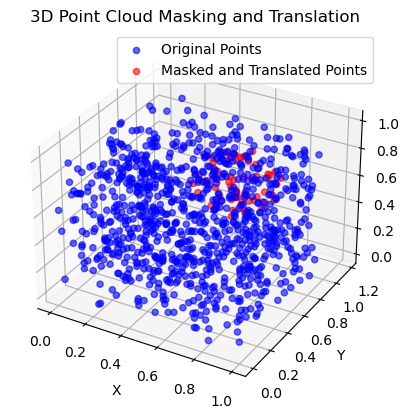

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import open3d as o3d

# Generate a random 3D point cloud
num_points = 1000
point_cloud = np.random.rand(num_points, 3)

# Define the center and radius of the sphere
center = np.array([0.5, 0.5, 0.5])
radius = 0.25

# Calculate the distance of each point from the center
distances = np.linalg.norm(point_cloud - center, axis=1)

# Select points within the sphere
within_sphere = distances < radius
masked_points = point_cloud[within_sphere]

# Translate the selected points in the Y direction
translation_distance = 0.5  # Translate by half the width of the point cloud
masked_points[:, 1] += translation_distance

# Remove the translated points from the original cloud
remaining_points = point_cloud[~within_sphere]

# Combine the remaining original points and the translated masked points
final_point_cloud = np.vstack((remaining_points, masked_points))

# Create colors for the points: red for translated, blue for remaining original
colors = np.zeros((final_point_cloud.shape[0], 3))
colors[len(remaining_points):] = [1, 0, 0]  # Red for translated points
colors[:len(remaining_points)] = [0, 0, 1]  # Blue for remaining original points

# Save the final point cloud as a PLY file with colors
ply_file_path = "final_point_cloud.ply"
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(final_point_cloud)
pcd.colors = o3d.utility.Vector3dVector(colors)
o3d.io.write_point_cloud(ply_file_path, pcd)

# Load and render the point cloud using Open3D
pcd = o3d.io.read_point_cloud(ply_file_path)
o3d.visualization.draw_geometries([pcd])

# Plot the original and masked point cloud using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot remaining original points
ax.scatter(remaining_points[:, 0], remaining_points[:, 1], remaining_points[:, 2], color='blue', alpha=0.6, label='Original Points')

# Plot masked and translated points
ax.scatter(masked_points[:, 0], masked_points[:, 1], masked_points[:, 2], color='red', alpha=0.6, label='Masked and Translated Points')

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Masking and Translation')

# Show legend
ax.legend()

# Show plot
plt.show()


Interlocutor: Render each ball in the point cloud as a shere of radius 1. 
Show the Spherical Shell that was used for masking before translation.
Un other words, I want to be able to fly through the point cloud and see an empty hole in the point cloud where the red points used to be and I want the boundary of that hole to be shaded light red.

GPT: Explanation of the changes:

Function to create a sphere: create_sphere function creates a sphere at a given center with a specified radius using Open3D.
Render each point as a sphere: Each point in the final point cloud is rendered as a small sphere.
Create a mesh for the spherical shell: A mesh representing the spherical shell used for masking is created and colored light red.
Visualize with Open3D: The draw_geometries function is used to render the point cloud and the spherical shell.
Plot the spherical shell in matplotlib: The spherical shell is plotted as a surface in matplotlib.

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


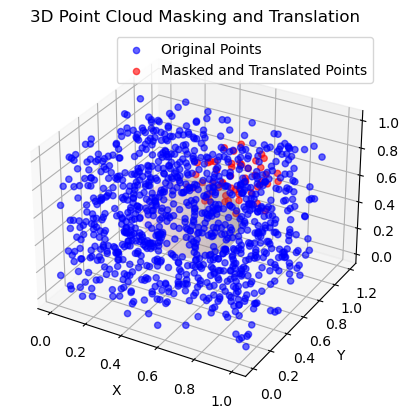

In [7]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_sphere(center, radius, resolution=20):
    sphere = o3d.geometry.TriangleMesh.create_sphere(radius, resolution=resolution)
    sphere.translate(center)
    return sphere

# Generate a random 3D point cloud
num_points = 1000
point_cloud = np.random.rand(num_points, 3)

# Define the center and radius of the sphere
center = np.array([0.5, 0.5, 0.5])
radius = 0.25

# Calculate the distance of each point from the center
distances = np.linalg.norm(point_cloud - center, axis=1)

# Select points within the sphere
within_sphere = distances < radius
masked_points = point_cloud[within_sphere]

# Translate the selected points in the Y direction
translation_distance = 0.5  # Translate by half the width of the point cloud
masked_points[:, 1] += translation_distance

# Remove the translated points from the original cloud
remaining_points = point_cloud[~within_sphere]

# Combine the remaining original points and the translated masked points
final_point_cloud = np.vstack((remaining_points, masked_points))

# Create colors for the points: red for translated, blue for remaining original
colors = np.zeros((final_point_cloud.shape[0], 3))
colors[len(remaining_points):] = [1, 0, 0]  # Red for translated points
colors[:len(remaining_points)] = [0, 0, 1]  # Blue for remaining original points

# Create a point cloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(final_point_cloud)
pcd.colors = o3d.utility.Vector3dVector(colors)

# Create spheres for each point
spheres = []
sphere_radius = 0.01  # Radius of each sphere representing a point
for point, color in zip(final_point_cloud, colors):
    sphere = create_sphere(point, sphere_radius)
    sphere.paint_uniform_color(color)
    spheres.append(sphere)

# Create a mesh for the spherical shell used for masking
spherical_shell = create_sphere(center, radius)
spherical_shell.paint_uniform_color([1, 0.8, 0.8])  # Light red color

# Visualize the point cloud with Open3D
o3d.visualization.draw_geometries(spheres + [spherical_shell])

# Optionally, plot the original and masked point cloud using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot remaining original points
ax.scatter(remaining_points[:, 0], remaining_points[:, 1], remaining_points[:, 2], color='blue', alpha=0.6, label='Original Points')

# Plot masked and translated points
ax.scatter(masked_points[:, 0], masked_points[:, 1], masked_points[:, 2], color='red', alpha=0.6, label='Masked and Translated Points')

# Plot the spherical shell
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='pink', alpha=0.2)

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Masking and Translation')

# Show legend
ax.legend()

# Show plot
plt.show()


Interlocutor: the shell in opaque and the spheres have no lighting. Now apply normal vectors so that all the spheres appear 3D and make the shell sphere transparent with opacity level of 35%.
Note GPT starts hallicinating at this point in venting interactive function beyond open3d's capacity. The reader can review the erroe codes and reples from GPT below:

In [1]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_sphere(center, radius, resolution=20):
    sphere = o3d.geometry.TriangleMesh.create_sphere(radius, resolution=resolution)
    sphere.compute_vertex_normals()
    sphere.translate(center)
    return sphere

# Generate a random 3D point cloud
num_points = 1000
point_cloud = np.random.rand(num_points, 3)

# Define the center and radius of the sphere
center = np.array([0.5, 0.5, 0.5])
radius = 0.25

# Calculate the distance of each point from the center
distances = np.linalg.norm(point_cloud - center, axis=1)

# Select points within the sphere
within_sphere = distances < radius
masked_points = point_cloud[within_sphere]

# Translate the selected points in the Y direction
translation_distance = 0.5  # Translate by half the width of the point cloud
masked_points[:, 1] += translation_distance

# Remove the translated points from the original cloud
remaining_points = point_cloud[~within_sphere]

# Combine the remaining original points and the translated masked points
final_point_cloud = np.vstack((remaining_points, masked_points))

# Create colors for the points: red for translated, blue for remaining original
colors = np.zeros((final_point_cloud.shape[0], 3))
colors[len(remaining_points):] = [1, 0, 0]  # Red for translated points
colors[:len(remaining_points)] = [0, 0, 1]  # Blue for remaining original points

# Create a point cloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(final_point_cloud)
pcd.colors = o3d.utility.Vector3dVector(colors)

# Create spheres for each point
spheres = []
sphere_radius = 0.01  # Radius of each sphere representing a point
for point, color in zip(final_point_cloud, colors):
    sphere = create_sphere(point, sphere_radius)
    sphere.paint_uniform_color(color)
    spheres.append(sphere)

# Create a mesh for the spherical shell used for masking
spherical_shell = create_sphere(center, radius)
spherical_shell.paint_uniform_color([1, 0.8, 0.8])  # Light red color
spherical_shell.compute_vertex_normals()

# Adjust the opacity of the spherical shell (transparency)
spherical_shell_alpha = 0.35
spherical_shell_vertex_colors = np.asarray(spherical_shell.vertex_colors)
spherical_shell_vertex_colors[:, 3] = spherical_shell_alpha  # Set alpha channel

# Visualize the point cloud with Open3D
o3d.visualization.draw_geometries(spheres + [spherical_shell])

# Optionally, plot the original and masked point cloud using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot remaining original points
ax.scatter(remaining_points[:, 0], remaining_points[:, 1], remaining_points[:, 2], color='blue', alpha=0.6, label='Original Points')

# Plot masked and translated points
ax.scatter(masked_points[:, 0], masked_points[:, 1], masked_points[:, 2], color='red', alpha=0.6, label='Masked and Translated Points')

# Plot the spherical shell
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='pink', alpha=0.35)

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Masking and Translation')

# Show legend
ax.legend()

# Show plot
plt.show()


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


IndexError: index 3 is out of bounds for axis 1 with size 3

I'm getting the above error when I compile the code. It appears from my human obsetvation, that the spherical_shell_vertex_colors object is three dimensional, but it's being coded as though a 4th dimension exists to control the alpha value. Is that correct? Can I fix this or is it not possible to set a 4th parameter in this object

You're correct that the vertex_colors array in Open3D typically only has three dimensions (R, G, B), not four (R, G, B, A). Open3D does not natively support transparency for individual vertex colors. Instead, you can achieve transparency by setting the alpha parameter in the Open3D visualization settings.
Explanation of the changes:

Open3D visualization with transparency: The Open3D visualization settings are used to set the transparency of the spherical shell.
Rendering spheres and spherical shell: All geometries (spheres and the spherical shell) are added to the Open3D visualizer.
Set transparency for the spherical shell: The mesh_alpha property is used to set the transparency of the spherical shell.
This approach ensures that the spheres appear 3D, and the spherical shell is semi-transparent.

In [2]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_sphere(center, radius, resolution=20):
    sphere = o3d.geometry.TriangleMesh.create_sphere(radius, resolution=resolution)
    sphere.compute_vertex_normals()
    sphere.translate(center)
    return sphere

# Generate a random 3D point cloud
num_points = 1000
point_cloud = np.random.rand(num_points, 3)

# Define the center and radius of the sphere
center = np.array([0.5, 0.5, 0.5])
radius = 0.25

# Calculate the distance of each point from the center
distances = np.linalg.norm(point_cloud - center, axis=1)

# Select points within the sphere
within_sphere = distances < radius
masked_points = point_cloud[within_sphere]

# Translate the selected points in the Y direction
translation_distance = 0.5  # Translate by half the width of the point cloud
masked_points[:, 1] += translation_distance

# Remove the translated points from the original cloud
remaining_points = point_cloud[~within_sphere]

# Combine the remaining original points and the translated masked points
final_point_cloud = np.vstack((remaining_points, masked_points))

# Create colors for the points: red for translated, blue for remaining original
colors = np.zeros((final_point_cloud.shape[0], 3))
colors[len(remaining_points):] = [1, 0, 0]  # Red for translated points
colors[:len(remaining_points)] = [0, 0, 1]  # Blue for remaining original points

# Create a point cloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(final_point_cloud)
pcd.colors = o3d.utility.Vector3dVector(colors)

# Create spheres for each point
spheres = []
sphere_radius = 0.01  # Radius of each sphere representing a point
for point, color in zip(final_point_cloud, colors):
    sphere = create_sphere(point, sphere_radius)
    sphere.paint_uniform_color(color)
    spheres.append(sphere)

# Create a mesh for the spherical shell used for masking
spherical_shell = create_sphere(center, radius)
spherical_shell.paint_uniform_color([1, 0.8, 0.8])  # Light red color
spherical_shell.compute_vertex_normals()

# Set up the Open3D visualization with transparency for the spherical shell
vis = o3d.visualization.Visualizer()
vis.create_window()

# Add all the sphere geometries to the visualizer
for sphere in spheres:
    vis.add_geometry(sphere)

# Add the spherical shell with transparency
render_option = vis.get_render_option()
render_option.mesh_show_back_face = True
vis.add_geometry(spherical_shell)
vis.update_geometry(spherical_shell)
spherical_shell_mesh = vis.get_geometry_handle(spherical_shell)
spherical_shell_mesh.shader_setting.mesh_alpha = 0.35  # Set transparency

# Start the visualizer
vis.run()
vis.destroy_window()

# Optionally, plot the original and masked point cloud using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot remaining original points
ax.scatter(remaining_points[:, 0], remaining_points[:, 1], remaining_points[:, 2], color='blue', alpha=0.6, label='Original Points')

# Plot masked and translated points
ax.scatter(masked_points[:, 0], masked_points[:, 1], masked_points[:, 2], color='red', alpha=0.6, label='Masked and Translated Points')

# Plot the spherical shell
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='pink', alpha=0.35)

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud Masking and Translation')

# Show legend
ax.legend()

# Show plot
plt.show()


AttributeError: 'open3d.cpu.pybind.visualization.Visualizer' object has no attribute 'get_geometry_handle'

: 


Interlocutor: Yet another error above. GPT is hallucinating. Correct me if my assumptions are wrong, but it appears that the open3D window does not provide feedback for updates other than point of view. Is there another library or package I should be using instead.
Are we getting into the territory where there is not enough of a training set for you to provide meaningful hallucinfree hallucination free code?


GPT: You're right that the Visualizer in Open3D does not support dynamic updates to transparency through the get_geometry_handle method, which does not exist. Open3D primarily supports static rendering and manual interaction through its GUI.

For dynamic and more complex visualizations, another library you might find more suitable is vtk (the Visualization Toolkit), which provides more robust options for 3D rendering and transparency control.

Here is how you can use vtk to achieve the desired visualization:

1. Render each point in the point cloud as a sphere.
2. Display the spherical shell with 35% opacity.


#### First, you need to install vtk:


<code> pip install vtk <code>


In [1]:
!pip install vtk


  Obtaining dependency information for vtk from https://files.pythonhosted.org/packages/0a/a5/c5e380300715cab30166d5ec9bba2ccabbf41452d3b09e2d7c1bfcfc11d5/vtk-9.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/52.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/52.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/52.4 MB 487.6 kB/s eta 0:01:48
   ---------------------------------------- 0.1/52.4 MB 930.9 kB/s eta 0:00:57
   ---------------------------------------- 0.3/52.4 MB 2.0 MB/s eta 0:00:27
    --------------------------------------- 0.7/52.4 MB 3.4 MB/s eta 0:00:16
    --------------------------------------- 1.0/52.4 MB 3.7 MB/s eta 0:00:15
    --------------------------------------- 1.3/52.4 MB 4.0 MB/s eta 0:00:13
   - -------------------------------------- 1.6/52.4 MB 4.6 MB/s eta 0:00:12
   - -------------------------------------- 1.8/52.4 MB 4.6 MB/s eta 0:00:12
   - -----------------------------------

In [2]:
import numpy as np
import vtk
from vtk.util import numpy_support

# Generate a random 3D point cloud
num_points = 1000
point_cloud = np.random.rand(num_points, 3)

# Define the center and radius of the sphere
center = np.array([0.5, 0.5, 0.5])
radius = 0.25

# Calculate the distance of each point from the center
distances = np.linalg.norm(point_cloud - center, axis=1)

# Select points within the sphere
within_sphere = distances < radius
masked_points = point_cloud[within_sphere]

# Translate the selected points in the Y direction
translation_distance = 0.5  # Translate by half the width of the point cloud
masked_points[:, 1] += translation_distance

# Remove the translated points from the original cloud
remaining_points = point_cloud[~within_sphere]

# Combine the remaining original points and the translated masked points
final_point_cloud = np.vstack((remaining_points, masked_points))

# Create colors for the points: red for translated, blue for remaining original
colors = np.zeros((final_point_cloud.shape[0], 3))
colors[len(remaining_points):] = [1, 0, 0]  # Red for translated points
colors[:len(remaining_points)] = [0, 0, 1]  # Blue for remaining original points

# Create a VTK renderer and window
renderer = vtk.vtkRenderer()
renderer.SetBackground(1, 1, 1)  # Set white background
render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)
render_window_interactor = vtk.vtkRenderWindowInteractor()
render_window_interactor.SetRenderWindow(render_window)

# Create a VTK points object and set the points from the point cloud
points = vtk.vtkPoints()
vtk_points = numpy_support.numpy_to_vtk(final_point_cloud, deep=True)
points.SetData(vtk_points)

# Create a VTK polydata object and add the points to it
polydata = vtk.vtkPolyData()
polydata.SetPoints(points)

# Create a VTK vertex glyph filter to represent each point as a vertex
vertex_filter = vtk.vtkVertexGlyphFilter()
vertex_filter.SetInputData(polydata)
vertex_filter.Update()

# Create a VTK polydata mapper and set the vertex filter output
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(vertex_filter.GetOutputPort())

# Create a VTK actor and set the mapper
actor = vtk.vtkActor()
actor.SetMapper(mapper)

# Apply colors to the points
vtk_colors = numpy_support.numpy_to_vtk((colors * 255).astype(np.uint8), deep=True, array_type=vtk.VTK_UNSIGNED_CHAR)
polydata.GetPointData().SetScalars(vtk_colors)

# Add the actor to the renderer
renderer.AddActor(actor)

# Create spheres for each point
sphere_radius = 0.01
for point, color in zip(final_point_cloud, colors):
    sphere_source = vtk.vtkSphereSource()
    sphere_source.SetCenter(point)
    sphere_source.SetRadius(sphere_radius)
    sphere_source.SetThetaResolution(16)
    sphere_source.SetPhiResolution(16)

    sphere_mapper = vtk.vtkPolyDataMapper()
    sphere_mapper.SetInputConnection(sphere_source.GetOutputPort())

    sphere_actor = vtk.vtkActor()
    sphere_actor.SetMapper(sphere_mapper)
    sphere_actor.GetProperty().SetColor(color)
    renderer.AddActor(sphere_actor)

# Create the spherical shell
shell_source = vtk.vtkSphereSource()
shell_source.SetCenter(center)
shell_source.SetRadius(radius)
shell_source.SetThetaResolution(50)
shell_source.SetPhiResolution(50)

shell_mapper = vtk.vtkPolyDataMapper()
shell_mapper.SetInputConnection(shell_source.GetOutputPort())

shell_actor = vtk.vtkActor()
shell_actor.SetMapper(shell_mapper)
shell_actor.GetProperty().SetColor(1, 0.8, 0.8)  # Light red color
shell_actor.GetProperty().SetOpacity(0.35)  # Set transparency
renderer.AddActor(shell_actor)

# Start the VTK rendering
render_window.Render()
render_window_interactor.Start()


GPT: Explanation:
VTK Points and Polydata: The points from the point cloud are converted to VTK format and stored in a vtkPoints object, which is then added to a vtkPolyData object.
Vertex Glyph Filter: The vtkVertexGlyphFilter is used to represent each point as a vertex.
Mapper and Actor: The mapper is set to the vertex filter output, and an actor is created and added to the renderer.
Colors: Colors are applied to the points using the vtkPolyData's point data.
Spheres for Points: Spheres are created for each point using vtkSphereSource and added to the renderer.
Spherical Shell: The spherical shell is created using vtkSphereSource, and its transparency is set using the SetOpacity method.
VTK Rendering: The VTK rendering window is set up, and the render window interactor starts to allow interactive exploration of the 3D visualization.

#### Dear reader the code works now but GPT forgot abou the MathPlotLib visual>

Interlocutor: Does VTK allow for a slider control where I can vary the value of translation distance between 0 and 2 and see the mask of the point cloud dynamically move?

Yes, VTK does support slider controls through its interactor style. You can create a slider widget to dynamically change the translation distance and update the position of the masked portion of the point cloud accordingly.

In [12]:
import numpy as np
import vtk
from vtk.util import numpy_support

# Generate a random 3D point cloud
num_points = 1000
point_cloud = np.random.rand(num_points, 3)

# Define the center and radius of the sphere
center = np.array([0.5, 0.5, 0.5])
radius = 0.25

# Calculate the distance of each point from the center
distances = np.linalg.norm(point_cloud - center, axis=1)

# Select points within the sphere
within_sphere = distances < radius
masked_points = point_cloud[within_sphere]

# Translate the selected points in the Y direction
initial_translation_distance = 0.5
translation_distance = initial_translation_distance  # Initialize translation distance
masked_points[:, 1] += translation_distance

# Remove the translated points from the original cloud
remaining_points = point_cloud[~within_sphere]

# Combine the remaining original points and the translated masked points
final_point_cloud = np.vstack((remaining_points, masked_points))

# Create colors for the points: red for translated, blue for remaining original
colors = np.zeros((final_point_cloud.shape[0], 3))
colors[len(remaining_points):] = [1, 0, 0]  # Red for translated points
colors[:len(remaining_points)] = [0, 0, 1]  # Blue for remaining original points

# Create a VTK renderer and window
renderer = vtk.vtkRenderer()
renderer.SetBackground(1, 1, 1)  # Set white background
render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)
render_window_interactor = vtk.vtkRenderWindowInteractor()
render_window_interactor.SetRenderWindow(render_window)

# Create a VTK points object and set the points from the point cloud
points = vtk.vtkPoints()
vtk_points = numpy_support.numpy_to_vtk(final_point_cloud, deep=True)
points.SetData(vtk_points)

# Create a VTK polydata object and add the points to it
polydata = vtk.vtkPolyData()
polydata.SetPoints(points)

# Create a VTK vertex glyph filter to represent each point as a vertex
vertex_filter = vtk.vtkVertexGlyphFilter()
vertex_filter.SetInputData(polydata)
vertex_filter.Update()

# Create a VTK polydata mapper and set the vertex filter output
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(vertex_filter.GetOutputPort())

# Create a VTK actor and set the mapper
actor = vtk.vtkActor()
actor.SetMapper(mapper)

# Apply colors to the points
vtk_colors = numpy_support.numpy_to_vtk((colors * 255).astype(np.uint8), deep=True, array_type=vtk.VTK_UNSIGNED_CHAR)
polydata.GetPointData().SetScalars(vtk_colors)

# Add the actor to the renderer
renderer.AddActor(actor)

# Create spheres for each point
sphere_radius = 0.01
for point, color in zip(final_point_cloud, colors):
    sphere_source = vtk.vtkSphereSource()
    sphere_source.SetCenter(point)
    sphere_source.SetRadius(sphere_radius)
    sphere_source.SetThetaResolution(16)
    sphere_source.SetPhiResolution(16)

    sphere_mapper = vtk.vtkPolyDataMapper()
    sphere_mapper.SetInputConnection(sphere_source.GetOutputPort())

    sphere_actor = vtk.vtkActor()
    sphere_actor.SetMapper(sphere_mapper)
    sphere_actor.GetProperty().SetColor(color)
    renderer.AddActor(sphere_actor)

# Create the spherical shell
shell_source = vtk.vtkSphereSource()
shell_source.SetCenter(center)
shell_source.SetRadius(radius)
shell_source.SetThetaResolution(50)
shell_source.SetPhiResolution(50)

shell_mapper = vtk.vtkPolyDataMapper()
shell_mapper.SetInputConnection(shell_source.GetOutputPort())

shell_actor = vtk.vtkActor()
shell_actor.SetMapper(shell_mapper)
shell_actor.GetProperty().SetColor(1, 0.8, 0.8)  # Light red color
shell_actor.GetProperty().SetOpacity(0.35)  # Set transparency
renderer.AddActor(shell_actor)

# Create a slider widget
slider_widget = vtk.vtkSliderWidget()
slider_widget.SetInteractor(render_window_interactor)
slider_widget.SetAnimationModeToAnimate()
slider_widget.SetEnabled(True)
slider_widget.SetRepresentation(None)  # Set representation below

# Create a slider representation
slider_rep = vtk.vtkSliderRepresentation2D()
slider_rep.SetMinimumValue(0)
slider_rep.SetMaximumValue(2)
slider_rep.SetValue(initial_translation_distance)
slider_rep.SetTitleText("Translation Distance")
slider_rep.GetPoint1Coordinate().SetCoordinateSystemToNormalizedDisplay()
slider_rep.GetPoint1Coordinate().SetValue(0.1, 0.1)
slider_rep.GetPoint2Coordinate().SetCoordinateSystemToNormalizedDisplay()
slider_rep.GetPoint2Coordinate().SetValue(0.9, 0.1)
slider_rep.SetSliderLength(0.02)
slider_rep.SetSliderWidth(0.03)
slider_rep.SetEndCapLength(0.01)
slider_rep.SetEndCapWidth(0.03)
slider_rep.SetTubeWidth(0.005)
slider_rep.SetLabelFormat("%0.2lf")
slider_rep.SetTitleHeight(0.02)
slider_rep.SetLabelHeight(0.02)
slider_rep.SetSliderLength(0.03)
slider_widget.SetRepresentation(slider_rep)

#Callback function for slider change event
def slider_callback(obj, event):
    global translation_distance
    translation_distance = obj.GetRepresentation().GetValue()
    masked_points[:, 1] = point_cloud[within_sphere, 1] + translation_distance
    vtk_points.DeepCopy(final_point_cloud)
    points.Modified()
    render_window.Render()

#Add slider callback function
slider_widget.AddObserver(vtk.vtkCommand.InteractionEvent, slider_callback)

#Start the VTK rendering
render_window.Render()
render_window_interactor.Start()


: 

In [2]:
import numpy as np
import vtk
from vtk.util import numpy_support

def create_sphere(center, radius, resolution=20):
    sphere = vtk.vtkSphereSource()
    sphere.SetCenter(center)
    sphere.SetRadius(radius)
    sphere.SetThetaResolution(resolution)
    sphere.SetPhiResolution(resolution)
    return sphere.GetOutput()

# Generate a random 3D point cloud
num_points = 1000
point_cloud = np.random.rand(num_points, 3)

# Define the center and radius of the sphere
center = np.array([0.5, 0.5, 0.5])
radius = 0.25

# Create VTK points and colors from the point cloud
vtk_points = vtk.vtkPoints()
vtk_colors = vtk.vtkUnsignedCharArray()
vtk_colors.SetNumberOfComponents(3)
vtk_colors.SetName("Colors")
for point in point_cloud:
    vtk_points.InsertNextPoint(point)
    vtk_colors.InsertNextTuple([0, 0, 255])  # Blue color

# Create a VTK polydata object and set the points and colors
polydata = vtk.vtkPolyData()
polydata.SetPoints(vtk_points)
polydata.GetPointData().SetScalars(vtk_colors)

# Create a VTK renderer and window
renderer = vtk.vtkRenderer()
renderer.SetBackground(1, 1, 1)  # Set white background
render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)
render_window.SetSize(800, 600)

# Create a VTK mapper and actor for the point cloud
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputData(polydata)
actor = vtk.vtkActor()
actor.SetMapper(mapper)
renderer.AddActor(actor)

# Create spheres for each point
sphere_radius = 0.01
for point in point_cloud:
    sphere = create_sphere(point, sphere_radius)
    mapper = vtk.vtkPolyDataMapper()
    mapper.SetInputData(sphere)
    actor = vtk.vtkActor()
    actor.SetMapper(mapper)
    actor.GetProperty().SetColor(0, 0, 1)  # Blue color
    renderer.AddActor(actor)

# Create sliders
slider_translation = vtk.vtkSliderRepresentation2D()
slider_translation.SetMinimumValue(0)
slider_translation.SetMaximumValue(2)
slider_translation.SetValue(0.5)
slider_translation.SetTitleText("Translation Distance")
slider_translation.GetPoint1Coordinate().SetCoordinateSystemToNormalizedDisplay()
slider_translation.GetPoint1Coordinate().SetValue(0.1, 0.1)
slider_translation.GetPoint2Coordinate().SetCoordinateSystemToNormalizedDisplay()
slider_translation.GetPoint2Coordinate().SetValue(0.9, 0.1)

slider_widget_translation = vtk.vtkSliderWidget()
slider_widget_translation.SetInteractor(render_window.GetInteractor())
slider_widget_translation.SetRepresentation(slider_translation)
slider_widget_translation.SetAnimationModeToAnimate()
slider_widget_translation.EnabledOn()

def update_translation(widget, event):
    global translation_distance
    translation_distance = widget.GetRepresentation().GetValue()
    update_mask()

def update_mask():
    global translation_distance
    masked_points = point_cloud[point_cloud[:, 1] < center[1] + translation_distance]
    masked_vtk_points = vtk.vtkPoints()
    for point in masked_points:
        masked_vtk_points.InsertNextPoint(point)
    polydata.SetPoints(masked_vtk_points)
    render_window.Render()

slider_widget_translation.AddObserver(vtk.vtkCommand.InteractionEvent, update_translation)

# Start the VTK rendering
render_window.Render()
render_window.GetInteractor().Start()


AttributeError: 'NoneType' object has no attribute 'Start'

: 